In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
path = r'D:\alessia\Instacart basket Analysis - Alessia'

In [7]:
df_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods_merged.pkl'))

In [8]:
df_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [9]:
df_cust_merge.shape

(32404859, 34)

In [10]:
df_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14   price_range_loc        object  
 15  price_range_loc         object  
 16  busiest_day             object  
 17  busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int64   
 20  loyalty_flag            object  
 21  avg_pr

# 2. Create a bar chart, a histogram, a scatterplot and a line chart.

## 2.1 Bar chart

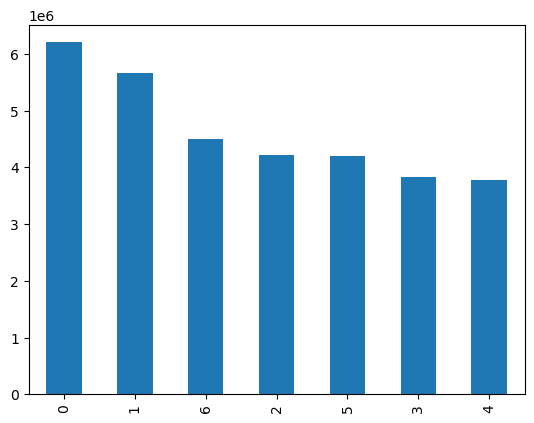

In [11]:
bar_1 = df_cust_merge['orders_day_of_week'].value_counts().plot.bar()

**sort bar by index order(days)**

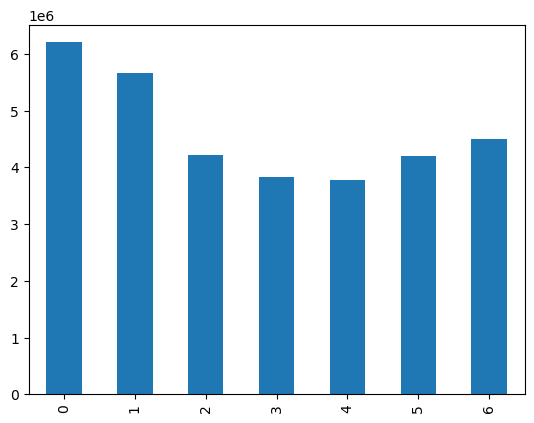

In [12]:
bar_2 = df_cust_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

## 2.2 Histogram

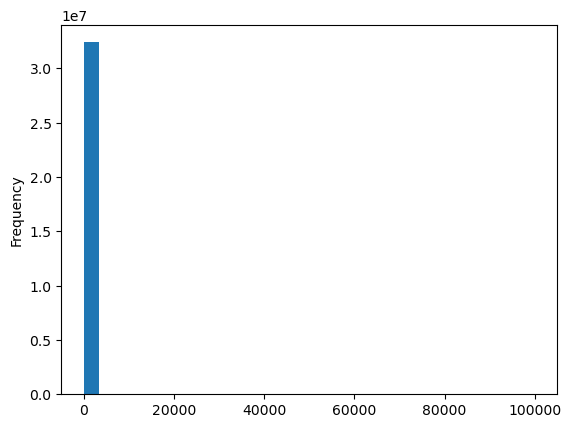

In [13]:
hist_1 = df_cust_merge['prices'].plot.hist(bins = 30)

***Comment: to get this result from a Histogram, we must have some outliers in the df. We need to run some checks and exclude them***

In [14]:
df_cust_merge.loc[df_cust_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Frequent customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,Regular customer,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Non-frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [15]:
df_cust_merge.loc[df_cust_merge['prices'] >100, 'prices'] = np.nan

***rerunning the histogram***

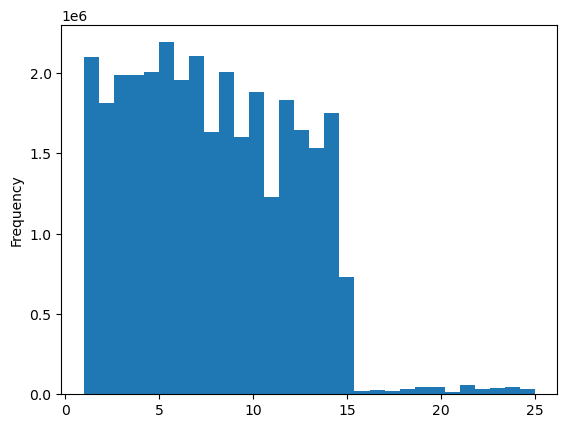

In [16]:
hist_1 = df_cust_merge['prices'].plot.hist(bins = 30)

## 2.3 Scatterplot

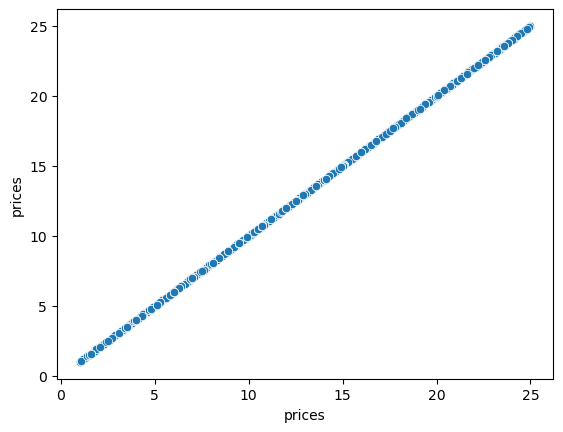

In [17]:
scat = sns.scatterplot(x = 'prices', y = 'prices',data = df_cust_merge)

## 2.3 Line chart + using a data sample

**create a 70/30 sample, checking it and storing it**

In [18]:
np.random.seed(4)
dev = np.random.rand(len(df_cust_merge)) <= 0.7

In [19]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [20]:
dev.shape

(32404859,)

In [21]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [22]:
big = df_cust_merge[dev]
small = df_cust_merge[~dev]

In [23]:
len(big) + len(small)

32404859

***Comment: everything seems ok, therefore I am creating the new dataframe and the chart with this new dF***

In [24]:
df_2 = small[['orders_day_of_week','prices']]

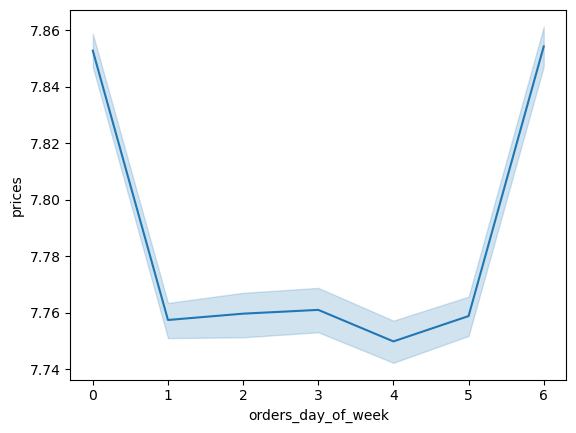

In [25]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

# 3. Provide Instacart senior stakeholders with descriptive findings about sales. Create Histogram of the "order_hour_of_day" column

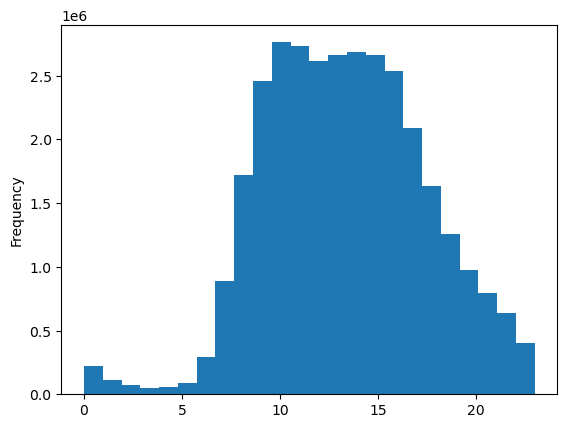

In [26]:
hist_3 = df_cust_merge['order_hour_of_day'].plot.hist(bins = 24)

***Comment: Histogram demostrates the frequency of orders throughout the day. Lowest frequency is between hours 0-6. Peak hours are between 10-16 and starts dropping gradually afterwards.***

# 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

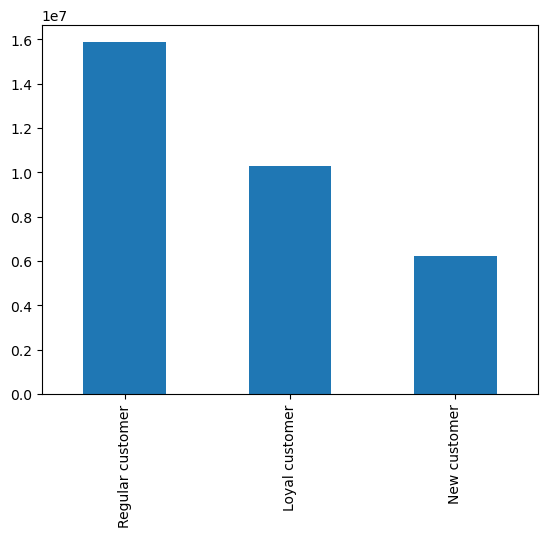

In [27]:
bar_4 = df_cust_merge['loyalty_flag'].value_counts().plot.bar()

# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [28]:
df_line = small[['order_hour_of_day', 'prices']]

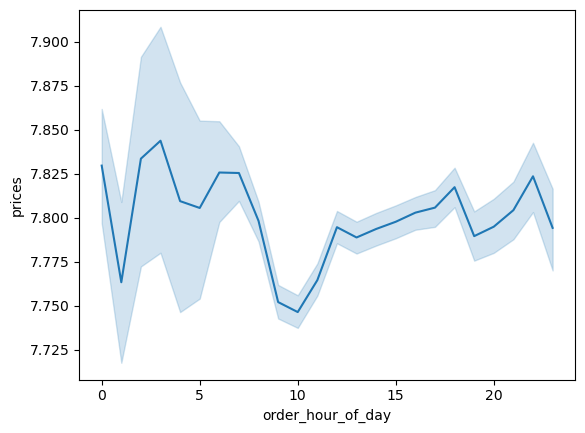

In [29]:
line_2 = sns.lineplot(data = df_line, x = 'order_hour_of_day', y = 'prices')

# 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.

In [30]:
df_line_2 = small[['Age', 'n_dependants']]

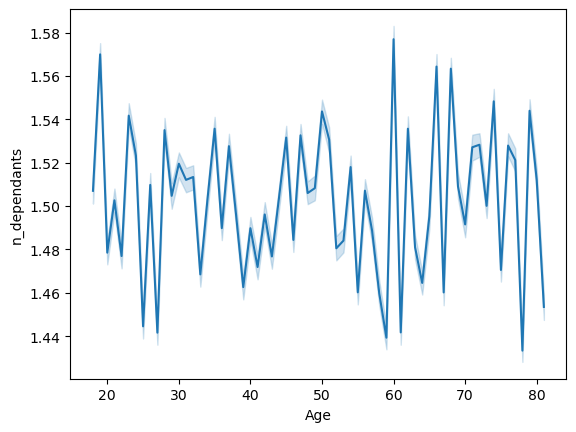

In [31]:
line_3 = sns.lineplot(data = df_line_2, x = 'Age', y = 'n_dependants')

***Comment: we can see some strong connections between age range and number of dependants in the age range 60-80, and before 20. Both seem a bit unexpected to me, therefore I would try to look into the definition of "dependants" a bit better. I interpret dependants as people which are financially dependent from me (i.e. kids), but this might differ in a different culture***

# 7.You’ll also need to explore whether there’s a connection between age and spending power (income).

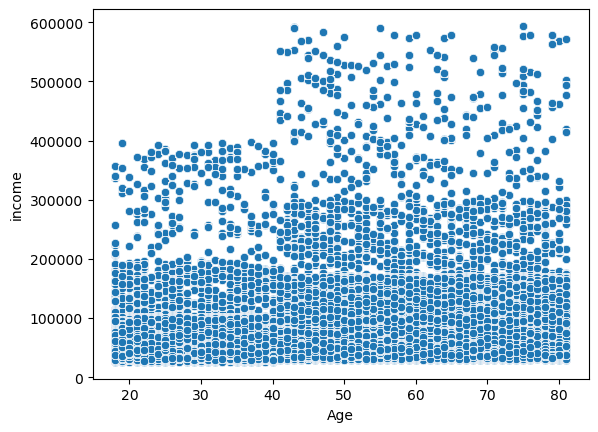

In [32]:
scat_2 = sns.scatterplot(x = 'Age', y = 'income',data = df_cust_merge)

***Comment: the majority of the population has an income below 200k. What is interesting, is that this number tends to go up after 40 yrs old.***

# 8. Exports

In [33]:
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [34]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_index.png'))

In [38]:
hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_25.png'))

In [39]:
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_prices.png'))

In [40]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_dow.png'))

In [41]:
hist_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hod.png'))

In [42]:
bar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyal.png'))

In [43]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hod.png'))

In [44]:
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dep.png'))

In [45]:
scat_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income.png'))